# Probability Distributions in Python¶

1. **[Literacy Rate Data](#sample1)**
2. **[United States Environmental Protection Agency EPA](#sample2)**

<a id="sample1"></a>
# Literacy Rate Data

## Import packages and libraries
Two new packages: SciPy stats and Statsmodels.

SciPy is an open-source software you can use for solving mathematical, scientific, engineering, and technical problems. It allows you to manipulate and visualize data with a wide range of Python commands. SciPy stats is a module designed specifically for statistics.

Statsmodels is a Python package that lets you explore data, work with statistical models, and perform statistical tests. It includes an extensive list of stats functions for different types of data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
education_districtwise = pd.read_csv('datasets/education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

**NOTE:** You can use `dropna()` to remove missing values in your data.

### Plot a histogram

The first step in trying to model your data with a probability distribution is to plot a histogram. This will help you visualize the shape of your data and determine if it resembles the shape of a specific distribution. 

Let's use matplotlib’s histogram function to plot a histogram of the district literacy rate data. Recall that the `OVERALL_LI` column contains this data. 

<Axes: >

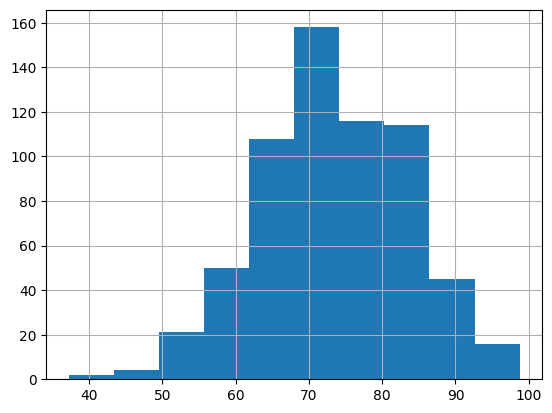

In [4]:
education_districtwise['OVERALL_LI'].hist()

### Normal distribution


The histogram shows that the distribution of the literacy rate data is bell-shaped and symmetric about the mean. The mean literacy rate, which is around 73%, is located in the center of the plot. Recall that the **normal distribution** is a continuous probability distribution that is bell-shaped and symmetrical on both sides of the mean. The shape of the histogram suggests that the normal distribution might be a good modeling option for the data. 

### Empirical rule

Since the normal distribution seems like a good fit for the district literacy rate data, we can expect the empirical rule to apply relatively well. Recall that the **empirical rule** says that for a normal distribution:

*   **68%** of the values fall within +/- 1 SD from the mean
*   **95%** of the values fall within +/- 2 SD from the mean
*   **99.7%** of the values fall within +/- 3 SD from the mean

**NOTE**: "SD" stands for standard deviation.

 In other words, we can expect that about:

*   **68%** of district literacy rates will fall within +/- 1 SD from the mean.
*   **95%** of district literacy rates will fall within +/- 2 SD from the mean.
*   **99.7%** of district literacy rates will fall within +/- 3 SD from the mean.

First, we will name two new variables to store the values for the mean and standard deviation of the district literacy rate: `mean_overall_li` and `std_overall_li`. 


In [5]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
mean_overall_li

73.39518927444796

The mean district literacy rate is about 73.4%.

In [6]:
std_overall_li = education_districtwise['OVERALL_LI'].std()
std_overall_li

10.098460413782467

The standard deviation is about 10%.

Now, let's compute the actual percentage of district literacy rates that fall within +/- 1 SD from the mean. 

To do this, we will first name two new variables: `lower_limit` and `upper_limit`. The lower limit will be one SD *below* the mean, or the mean - (1 * SD). The upper limit will be one SD *above* the mean, or the mean + (1 * SD). To write the code for the calculations, we will use our two previous variables, `mean_overall_li` and `std_overall_li`, for the mean and standard deviation.

Then, we will add a new line of code that tells the computer to decide if each value in the `OVERALL_LI` column is between the lower limit and upper limit. To do this, we will use the relational operators greater than or equal to (`>=`) and less than or equal to (`<=`), and the bitwise operator AND (`&`). Finally, we will use `mean()` to divide the number of values that are within 1 SD of the mean by the total number of values. 

In [7]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.6640378548895899

Next, let's use the same code structure to compute the actual percentage of district literacy rates that fall within +/- 2 SD from the mean.

In [8]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9542586750788643

Finally, we will use the same code structure to compute the actual percentage of district literacy rates that fall within +/- 3 SD from the mean.

In [9]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9968454258675079

Our values agree quite well with the empirical rule!

Our values of 66.4%, 95.4%, and 99.6% are very close to the values the empirical rule suggests: roughly 68%, 95%, and 99.7%.

Knowing that your data is normally distributed is useful for analysis because many statistical tests and machine learning models assume a normal distribution. Plus, when your data follows a normal distribution, you can use z-scores to measure the relative position of your values and find outliers in your data.

### Compute z-scores to find outliers

Recall that a **z-score** is a measure of how many standard deviations below or above the population mean a data point is. A z-score is useful because it tells you where a value lies in a distribution. 

Data professionals often use z-scores for outlier detection. Typically, they consider observations with a z-score smaller than -3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean. 

To find outliers in the data, we will first create a new column called `Z_SCORE` that includes the z-scores for each district literacy rate in your dataset. Recall that the `OVERALL_LI` column lists all the district literacy rates.  

Then, we will compute the z-scores using the function `scipy.stats.zscore()`. 

**Reference**: [scipy.stats.zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

In [10]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


Now that we have computed z-scores for our dataset,we will write some code to identify outliers, or districts with z-scores that are more than +/- 3 SDs from the mean. Let's use the relational operators greater than (`>`) and less than (`<`), and the bitwise operator OR (`|`). 

In [11]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


Using z-scores, we can identify two outlying districts that have unusually low literacy rates: `DISTRICT461` and `DISTRICT429`. The literacy rates in these two districts are more than 3 SDs *below* the  overall mean literacy rate. 

Our analysis gives us important information to share. The government may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy. 

<a id="sample2"></a>
# United States Environmental Protection Agency EPA

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 
Import relevant libraries, packages, and modules. For this lab, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [12]:
# Import relevant libraries, packages, and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. Load into a DataFrame.

In [13]:
# Load data into a DataFrame and save in a variable.
data = pd.read_csv("datasets/modified_c4_epa_air_quality.csv")

## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [14]:
# Display first 10 rows of the data.
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. 

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [15]:
# Display number of rows, number of columns.
data.shape

(260, 8)

Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

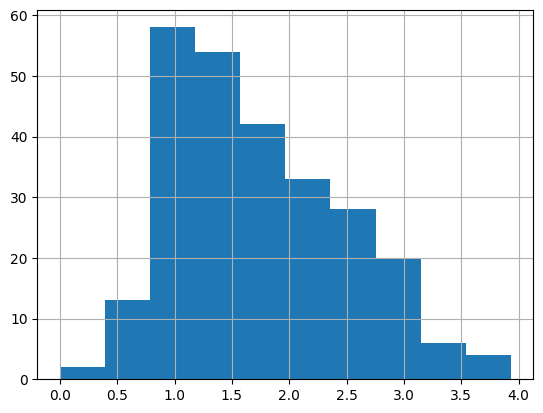

In [16]:
# Create a histogram to visualize distribution of aqi_log.
data["aqi_log"].hist();

**Question:** What do you observe about the shape of the distribution from the histogram? 

There is a slight right skew, but it still appears to be a bell shape. This shape suggests that the distribution of this data should be approximately normal.

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.

As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean

First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [17]:
# Define variable for aqi_log mean.
mean_aqi_log = data["aqi_log"].mean()

# Print out the mean.
print(mean_aqi_log)

1.7669210929985582


In [18]:
# Define variable for aqi_log standard deviation.
std_aqi_log = data["aqi_log"].std()

# Print out the standard deviation.
print(std_aqi_log)

0.7147155520223721


Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [20]:
# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit = mean_aqi_log - 1 * std_aqi_log

# Define variable for upper limit, 1 standard deviation above the mean.
upper_limit = mean_aqi_log + 1 * std_aqi_log

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

1.052205540976186 2.4816366450209304


In [21]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

76.15384615384615

Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [22]:
# Define variable for lower limit, 2 standard deviations below the mean.
lower_limit = mean_aqi_log - 2 * std_aqi_log

# Define variable for upper limit, 2 standard deviations below the mean.
upper_limit = mean_aqi_log + 2 * std_aqi_log

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

0.3374899889538139 3.1963521970433026


In [23]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

95.76923076923077

Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [24]:
# Define variable for lower limit, 3 standard deviations below the mean.
lower_limit = mean_aqi_log - 3 * std_aqi_log

# Define variable for upper limit, 3 standard deviations above the mean.
upper_limit = mean_aqi_log + 3 * std_aqi_log

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

-0.37722556306855815 3.9110677490656744


In [25]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

99.61538461538461

## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 
- About 76.15% of the data falls within 1 standard deviation of the mean.
- About 95.77% of the data falls within 2 standard deviation of the mean.
- About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal. 

**Question:** How would you use z-score to find outliers?

Since z-score indicates the relative position of values (for instance, z-score measures how many standard deviations below or above the mean a data point is), it can be used to detect outliers.

Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [26]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
data["z_score"] = stats.zscore(data["aqi_log"], ddof=1) # ddof=degrees of freedom correction (sample vs. population)

# Display the first 5 rows to ensure that the new column was added.
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [27]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


**Question:** What do you observe about potential outliers based on the calculations?

The `aqi_log` for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

**Question:** Why is outlier detection an important part of this project? 

Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements. 

For example, if the `aqi_log` for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.

## **Considerations**

**What are some key takeaways that you learned during this lab?**
- Plotting the data using a histogram, then observing the shape, enables you to visually determine whether the data is normally distributed.
- The empirical rule can be used to verify whether a distribution is normal.
- The mean and standard deviation are important measures when applying the empirical rule to a distribution.
- Z-score allows you to identify potenial outliers in the data.

**What summary would you provide to stakeholders? Consider the distribution of the data and which sites would benefit from additional research.**
- The distribution of the `aqi_log` data is approximately normal.
- Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites. 
- Consider allocating more resources toward further examining this site in order to improve its air quality.

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 